# Circuit implementation of Quantum Phase Estimation using Qiskit

This notebook will teach you how to construct your own circuits for Quantum Phase Estimation using Qiskit.

# Install Qiskit

Install Qiskit if you haven't. Here we are not installing the latest version of Qiskit since it has an issue with displaying circuits using matplotlib (fancy circuits) in Colab.

In [ ]:
!pip install qiskit==0.16.1

# Importing Packages

In [ ]:
from qiskit import * # No need to explain why
import matplotlib as mpl # Required to display some fancy circuits
import numpy as np # Need it for using pi

# The circuit

Now, we move on to main part of the notebook. In this section, we shall explain the construction of circuits for Quantum Phase Estimation of a single qubit gate, with $3$-bit precision expected. Given a method to prepare an eigenvector $| \psi \rangle$ of a one-qubit gate $U$, the circuit should be able to compute the phase of it's corresponding eigenvalue, that is, $\theta$ such that $e^{2\pi i \theta}$ is the eigenvalue associated with $| \psi \rangle$. For a $3$-bit approximation of $\theta$, the circuit for Quantum Phase Estimation requires $2 ^ {0} + 2 ^ {1} + 2 ^ {2} = 7$ controlled-$U$ gates and an inverse Quantum Fourier Transform circuit. The circuit is as follows:

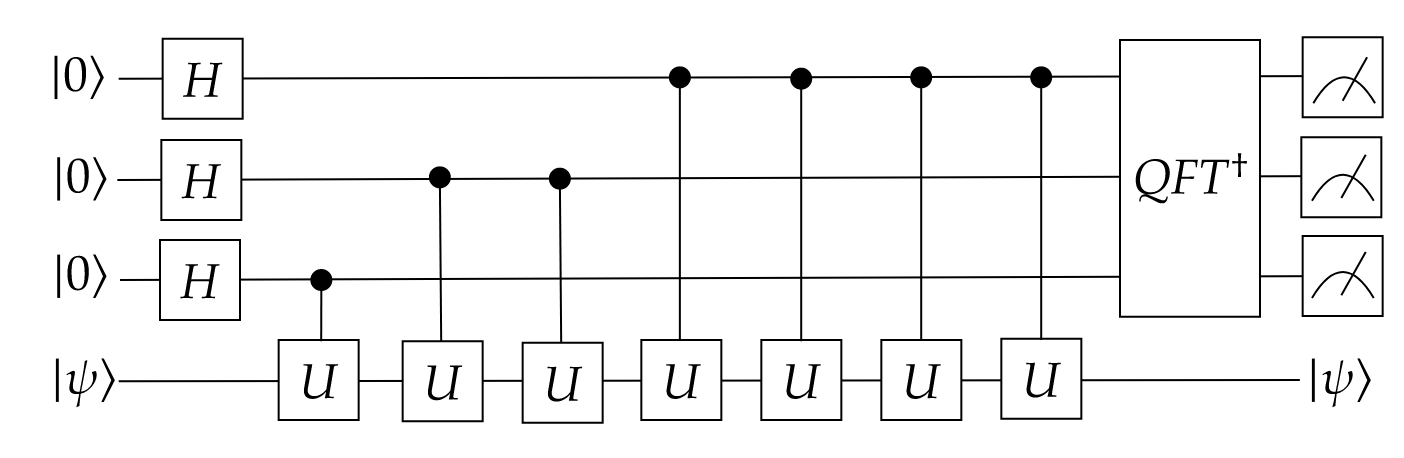

We know that for any $3$-bit string $x = x_1x_2x_3$, a Quantum Fourier Transform circuit has the form

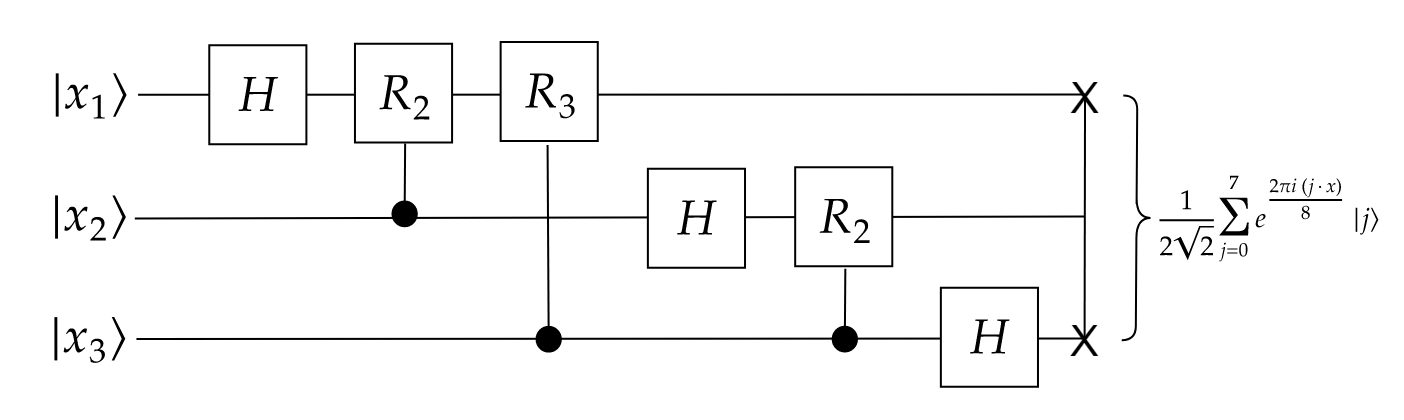

where each of the controlled-$R_k$ gates is given as 

\begin{equation}
  CR_k =
  \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 0 & 0 & e ^ {\frac{2 \pi i}{2 ^ k}}
  \end{bmatrix}
\end{equation}


So, the inverse Quantum Fourier Transform, which is essentially the inverse of the above gates applied in reverse, is given as

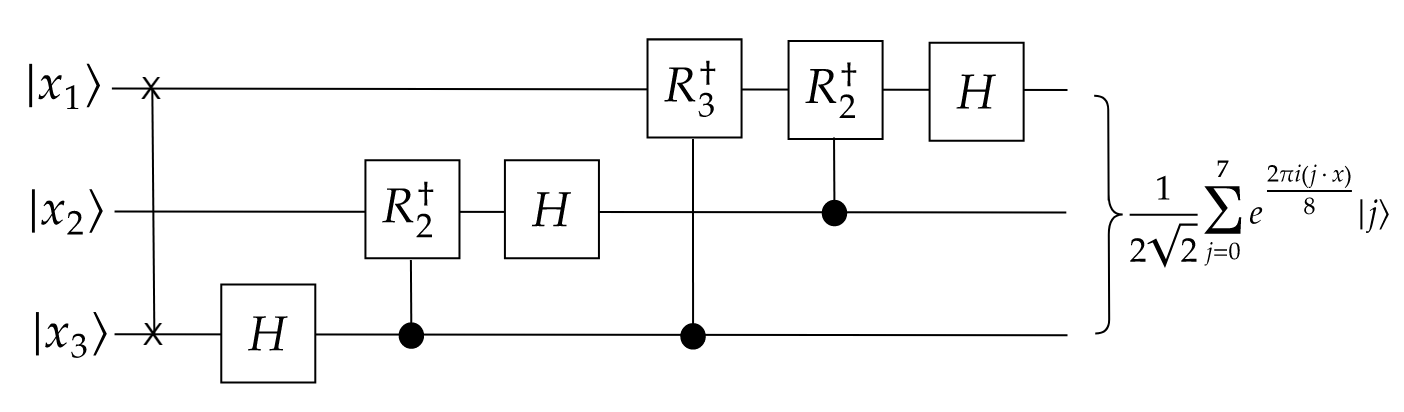

Here, the controlled-$R_k^{\dagger}$ gates will have the form

\begin{equation}
  CR_k^{\dagger} =
  \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 0 & 0 & e ^ {\frac{-2 \pi i}{2 ^ k}}
  \end{bmatrix}
\end{equation}


# Case 1

In this example, we are going to take $U$ to be the matrix

\begin{equation}
  U = 
  \begin{bmatrix}
    1 & 0 \\
    0 & e^{\frac{\pi i}{4}}
  \end{bmatrix}
\end{equation}

This is the famed $T$ gate. Since this is a diagonal matrix, it's eigenvectors are $|0\rangle$ with eigenvalue $1$ and $|1\rangle$ with eigenvalue $e^{\frac{ \pi i}{4}}$. That means, the phase associated with the eigenvector $|1\rangle$ is $\frac{1}{8}$, and the phase associated with the eigenvector $|0\rangle$ is $0$. If we want to carry out phase estimation with this matrix, then we should be able to apply this matrix, as a gate, in a controlled manner, that is, we should be able to use the gate

\begin{equation}
  CU =
  \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 0 & 0 & e ^ {\frac{\pi i}{4}}
  \end{bmatrix}
\end{equation}
 
 This, as well as the $CR_k^{\dagger}$ gates, can be achieved by the controlled-$U1$ gate in Qiskit, whose form is 

 \begin{equation}
  CU1(\phi) =
  \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 0 & 0 & e ^ {i \phi}
  \end{bmatrix}
\end{equation}

## When $| \psi \rangle = |1\rangle$

In this section, we shall use our $U$ gate (in a controlled manner) to compute the phase associated with it's eigenvector $|1\rangle$. Our final circuit will have the form

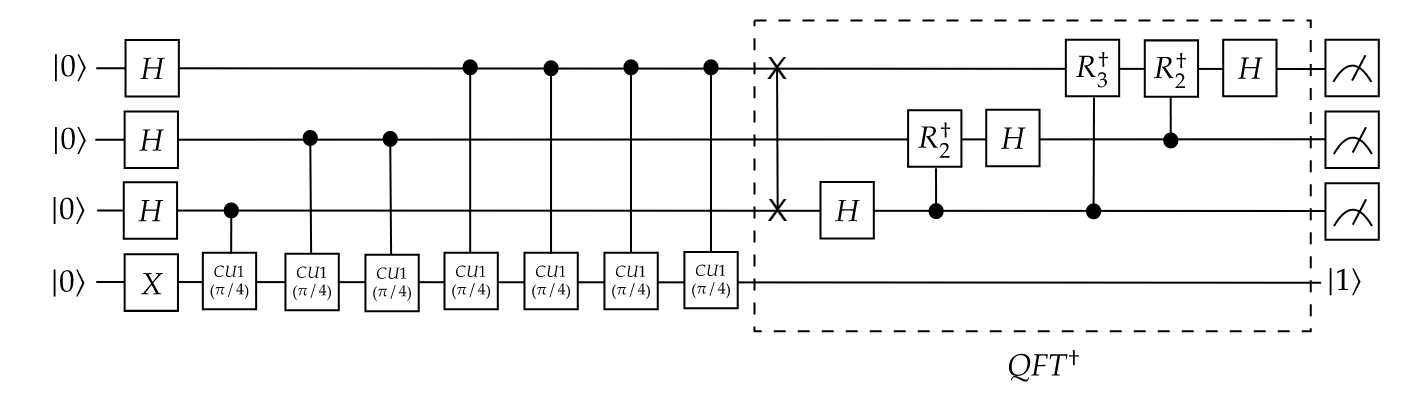

Now, let's move on to constructing the circuit using Qiskit. In our construction, the bottom qubit in the circuit diagram given above is qubit 0 and the top qubit is qubit 3.

First, we prepare the quantum register. As we can see, from the circuit, the quantum register comprises of 4 qubits. Hence

In [ ]:
# Prepare quantum register
qr = QuantumRegister(4)

Next, we shall prepare the classical register which will have the classical output after measurement. Since the circuit only requires measuring three qubits, the classical register requires only $3$ bits. So 

In [ ]:
# Prepare the classical register
cr = ClassicalRegister(3)

Combining both the quantum and classical registers, we now define the quantum circuit

In [ ]:
# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

Now, we shall start applying the gates.

The first step to to prepare the eigenvector $|1\rangle$ in the qubit 0. 

In [ ]:
# Apply X gate on qubit 0
qc.x(0)

Next step is to apply Hadamard gates on all the other qubits.

In [ ]:
# Apply Hadamard gates on qubits 1,2,3
qc.h(3)
qc.h(2)
qc.h(1)

Now, we shall apply the controlled rotations.

In [ ]:
# Apply controlled rotations controlled on qubit 1
qc.cu1(np.pi/4, 1, 0)

# Apply controlled rotations controlled on qubit 2
qc.cu1(np.pi/4, 2, 0)
qc.cu1(np.pi/4, 2, 0)

# Apply controlled rotations controlled on qubit 3
qc.cu1(np.pi/4, 3, 0)
qc.cu1(np.pi/4, 3, 0)
qc.cu1(np.pi/4, 3, 0)
qc.cu1(np.pi/4, 3, 0)

Let's take a break and look at the circuit we have built so far.

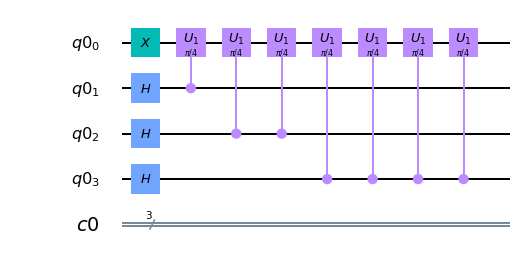

In [ ]:
# Display circuit
qc.draw(output = "mpl")

Looks good. Now we'll move on to the inverse QFT part.

In [ ]:
# Apply swap gate on qubits 1 and 3
qc.swap(1,3)

# Apply Hadamard gate on qubit 1
qc.h(1)

# Apply controlled-Rk gate
qc.cu1(-np.pi/2, 1, 2)

# Apply Hadamard gate on qubit 2
qc.h(2)

# Apply controlled-Rk gate
qc.cu1(-np.pi/4, 1, 3)
qc.cu1(-np.pi/2, 2, 3)

# Apply Hadamard gate on qubit 3
qc.h(3)

Now, the circuit look like this

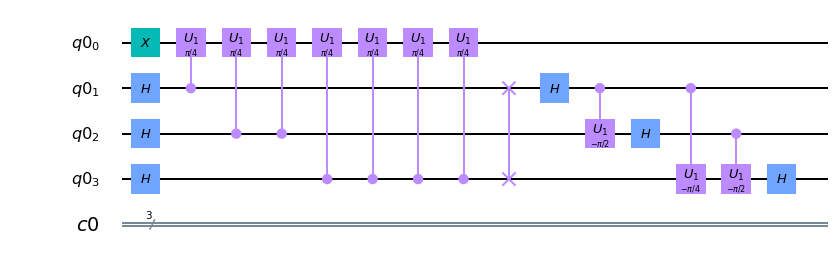

In [ ]:
# Display circuit
qc.draw(output = "mpl")

Looks very good. Now, let's measure and simulate this circuit $1000$ times.

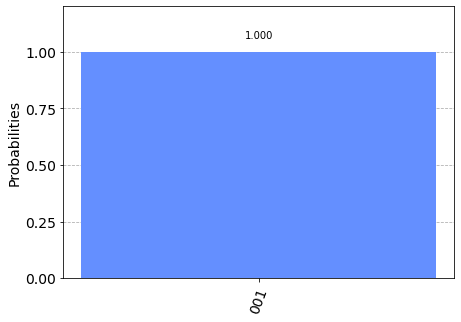

In [ ]:
# Measure qubits 1,2,3
qc.measure(3, 2)
qc.measure(2, 1)
qc.measure(1, 0)

# Get measurement results of 1000 simulations
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1000)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

As we can see, the output is always $1$. Now, to the get the value of the phase $\theta$, we simply divide the output by $2^{3} = 8$, which gives us $\frac{1}{8}$, which is the correct answer. 

## When $| \psi \rangle = |0\rangle$

In this section, we shall use our $U$ gate (in a controlled manner) to compute the phase associated with it's eigenvector $|0\rangle$. Our final circuit will have the form

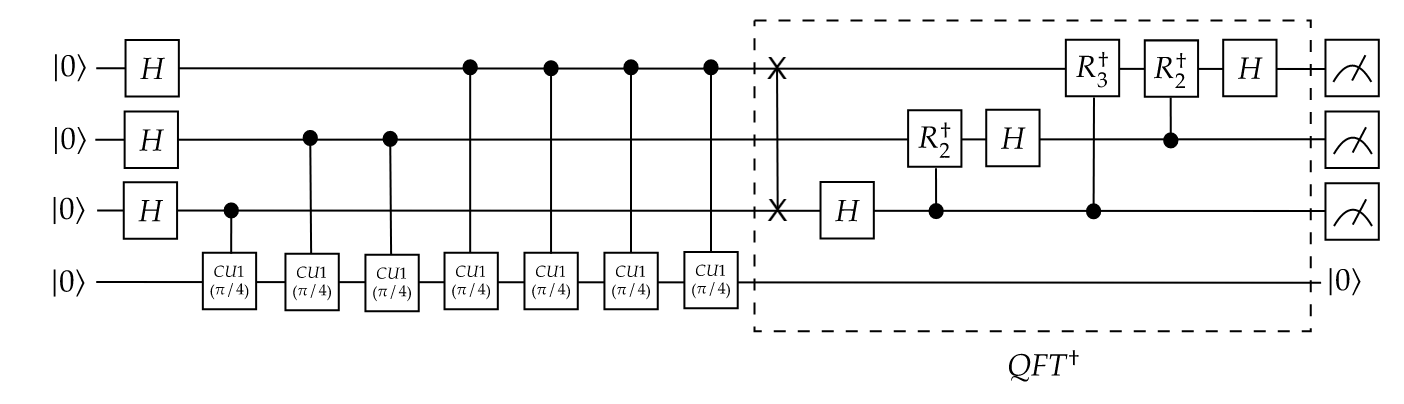

Since constructing and executing the phase estimation circuit for the eigenvector $|1\rangle$ was explained in detail in the previous section, we are not going to explain the circuit for the eigenvector $|0\rangle$'s extensively as it is extremely similar to that of $|1\rangle$, except for the vector preparation part. 

Executing the cell below runs a quantum circuit for the Quantum Phase Estimation for the unitary $U$ and the eigenvector $|0\rangle$ $1000$ times.

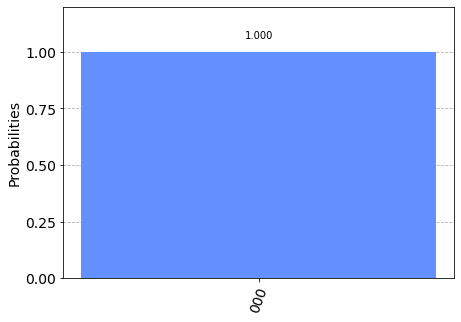

In [ ]:
# Prepare quantum register
qr = QuantumRegister(4)

# Prepare the classical register
cr = ClassicalRegister(3)

# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gates on qubits 1,2,3
for i in range(3,0,-1):
  qc.h(i)

# Apply controlled rotations
for i in range(1,4):
  for j in range(2 ** (i-1)):
    qc.cu1(2 * np.pi/5, i, 0)

# Apply inverse QFT
qc.swap(1,3)
for i in range(3):
  for j in range(i):
    qc.cu1(-np.pi/(2 ** (i-j)), j+1, i+1)
  qc.h(i+1)

# Measure qubits 1,2,3
for i in range(3):
  qc.measure(i+1,i)


# Get measurement results of 1000 simulations
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1000)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

As we can see, the output is always $0$, which means that the phase associated with $|0\rangle$ is $0$.

# Case 2

In case of the $T$ gate, since the phase is $\frac{1}{8}$ we always get the exact answer as the output of the phase estimation circuit, if we use $3$ qubits in th first register. We know that in most cases, the output of the phase estimation circuit is an approximation of the phase, rather than the exact answer. Consider the gate

\begin{equation}
  U = 
  \begin{bmatrix}
    1 & 0 \\
    0 & e^{\frac{2 \pi i}{5}}
  \end{bmatrix}
\end{equation}

Since this is also a diagonal matrix, it's eigenvectors are $|0\rangle$ with eigenvalue $1$ and $|1\rangle$ with eigenvalue $e^{\frac{ 2 \pi i}{5}}$. That means, the phase associated with the eigenvector $|1\rangle$ is $\frac{1}{5}$, and the phase associated with the eigenvector $|0\rangle$ is $0$. If we want to carry out phase estimation with this matrix, then we should be able to apply this matrix, as a gate, in a controlled manner, that is, we should be able to use the gate

\begin{equation}
  CU =
  \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 0 & 0 & e ^ {\frac{2 \pi i}{5}}
  \end{bmatrix}
\end{equation}
 
This, can also be done by the $CU1(\phi)$ gate available in Qiskit, whose structure is described in the previous section. 


## When $| \psi \rangle = |0\rangle$

In this case, we start with finding the phase associated with the eigenvector $|0\rangle$. The final circuit will have the form

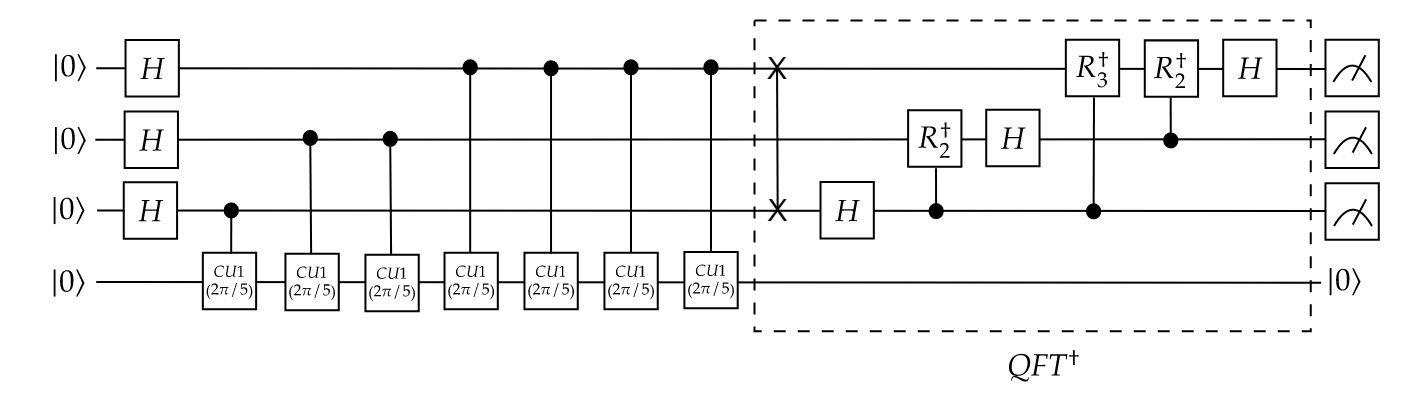

Executing the cell below runs a quantum circuit for the Quantum Phase Estimation for the unitary $U$ and the eigenvector $|0\rangle$ $1000$ times.

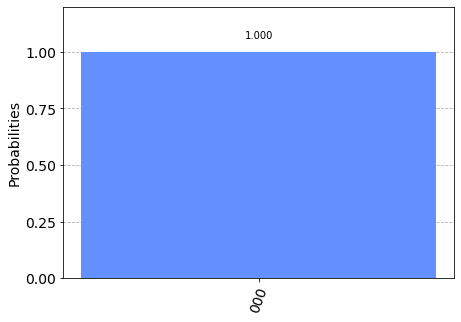

In [ ]:
# Prepare quantum register
qr = QuantumRegister(4)

# Prepare the classical register
cr = ClassicalRegister(3)

# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gates on qubits 1,2,3
for i in range(3,0,-1):
  qc.h(i)

# Apply controlled rotations
for i in range(1,4):
  for j in range(2 ** (i-1)):
    qc.cu1(2 * np.pi/5, i, 0)

# Apply inverse QFT
qc.swap(1,3)
for i in range(3):
  for j in range(i):
    qc.cu1(-np.pi/(2 ** (i-j)), j+1, i+1)
  qc.h(i+1)

# Measure qubits 1,2,3
for i in range(3):
  qc.measure(i+1,i)


# Get measurement results of 1000 simulations
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1000)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

As we can see, the output is always $0$, which means that the phase associated with $|0\rangle$ is $0$.


## When $| \psi \rangle = |1\rangle$

Now, we shall move on to finding the phase associated with the eigenvector $|1\rangle$. The circuit will then have the form

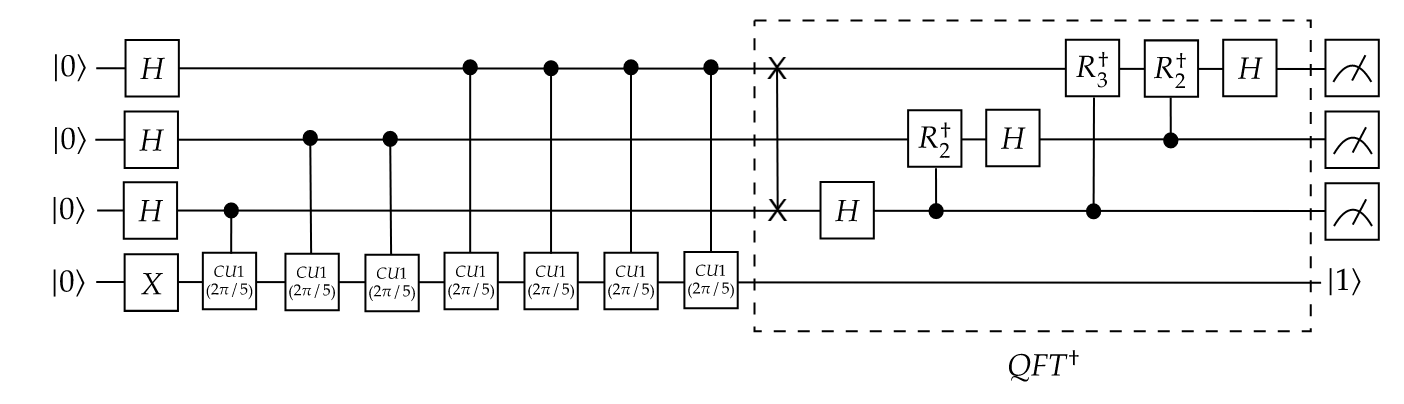

Executing the cell below runs a quantum circuit for the Quantum Phase Estimation for the unitary $U$ and the eigenvector $|1\rangle$ $1000$ times.

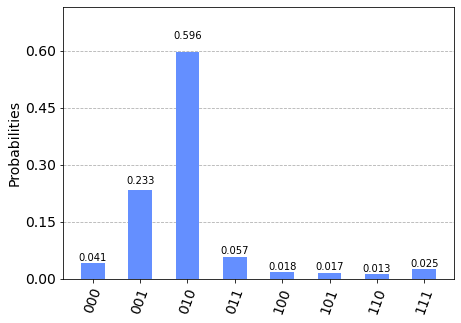

In [ ]:
# Prepare quantum register
qr = QuantumRegister(4)

# Prepare the classical register
cr = ClassicalRegister(3)

# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gates on qubits 1,2,3
for i in range(3,0,-1):
  qc.h(i)

# Apply X gate on qubit 0
qc.x(0)

# Apply controlled rotations
for i in range(1,4):
  for j in range(2 ** (i-1)):
    qc.cu1(2 * np.pi/5, i, 0)

# Apply inverse QFT
qc.swap(1,3)
for i in range(3):
  for j in range(i):
    qc.cu1(-np.pi/(2 ** (i-j)), j+1, i+1)
  qc.h(i+1)

# Measure qubits 1,2,3
for i in range(3):
  qc.measure(i+1,i)


# Get measurement results of 1000 simulations
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1000)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

In this case, we see that there have been multiple outcomes as the result of this simulation. The most probable outcome is $2$. That means, the phase associated with $|1\rangle$ is approximately $\frac{2}{2^3} = \frac{1}{4}$. The exact value of the phase is $\frac{1}{5}$. So, the approximation returned by the circuit makes sense.

We can also try to make the approximation better by adding one more qubit and try to get $4$-bit approximaion of the phase. Then the circuit would have the form

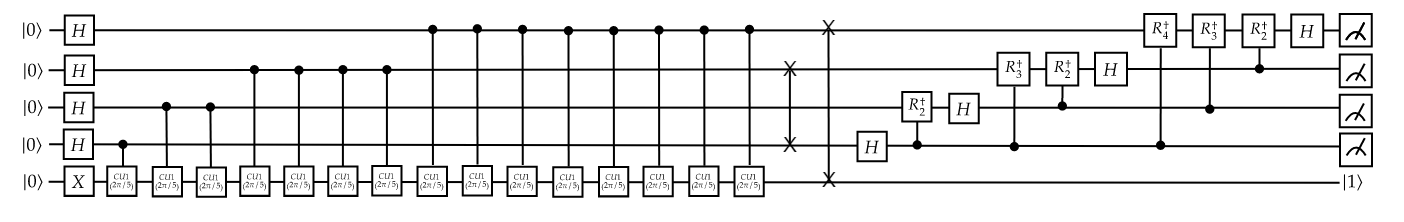

Executing the cell below runs a quantum circuit for the Quantum Phase Estimation for the unitary $U$ and the eigenvector $|1\rangle$ with $4$ bit precision $1000$ times.

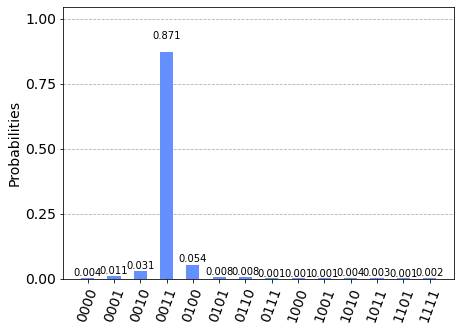

In [ ]:
# Prepare quantum register
qr = QuantumRegister(5)

# Prepare the classical register
cr = ClassicalRegister(4)

# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gates on qubits 1,2,3,4
for i in range(4,0,-1):
  qc.h(i)

# Apply X gate on qubit 0
qc.x(0)

# Apply controlled rotations
for i in range(1,5):
  for j in range(2 ** (i-1)):
    qc.cu1(2 * np.pi/5, i, 0)

# Apply inverse QFT
qc.swap(1,4)
qc.swap(2,3)
for i in range(4):
  for j in range(i):
    qc.cu1(-np.pi/(2 ** (i-j)), j+1, i+1)
  qc.h(i+1)

# Measure qubits 1,2,3,4
for i in range(4):
  qc.measure(i+1,i)


# Get measurement results of 1000 simulations
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1000)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

The most probable outcome here is $3$. That means, the phase associated with $|1\rangle$ is approximately $\frac{3}{2^4} = \frac{3}{16}$. This is a better approximation than $\frac{1}{4}$, which we saw as the most probable output with $3$ qubits in the first register. The circuit can be visualized as

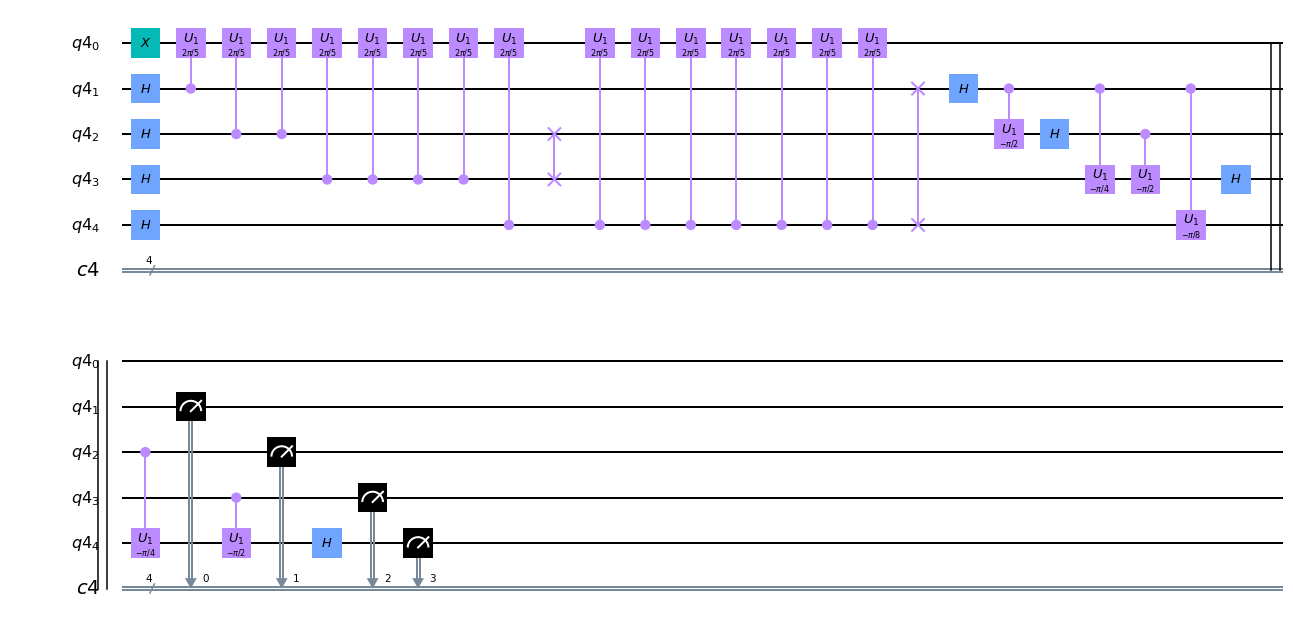

In [ ]:
qc.draw(output = 'mpl')